Read in images and extract image classes.
Credit to Kevin Mader for this section: https://www.kaggle.com/mholub/image-overview


In [3]:
import os
import numpy as np 
import pandas as pd 
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
# load input images
all_tif_images=glob('C:/Users/Alex/Documents/GitHub/high-content-convnet/high-content-convnet/BBBC010_v1_images/*_w1_*.tif')
all_fg_images=glob('C:/Users/Alex/Documents/GitHub/high-content-convnet/high-content-convnet/BBBC010_v1_foreground/*.png')
# put input images paths into pandas DataFrame
image_df=pd.DataFrame([{'gfp_path': f} for f in all_tif_images])

image_df.iloc[1,0]

'C:/Users/Alex/Documents/GitHub/high-content-convnet/high-content-convnet/BBBC010_v1_images\\1649_1109_0003_Amp5-1_B_20070424_A02_w1_773004B9-5D0A-4322-AFC2-CF6D9D5068A9.tif'

""


In [8]:
# define mapping function
def _get_light_path(in_path):
    w2_path='_w2_'.join(in_path.split('_w1_'))
    glob_str='_'.join(w2_path.split('_')[:-1]+['*.tif'])
    m_files=glob(glob_str)
    if len(m_files)>0:
        return m_files[0]
    else:
        return None
# create new columns with yet another paths
image_df['light_path']=image_df['gfp_path'].map(_get_light_path)
image_df=image_df.dropna()
image_df['base_name']=image_df['gfp_path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])

image_df['base_name'][1]

'1649_1109_0003_Amp5-1_B_20070424_A02_w1_773004B9-5D0A-4322-AFC2-CF6D9D5068A9'

In [9]:
# Extract data from the image name

# clearly this is not the case
# <plate>_<wellrow>_<wellcolumn>_<wavelength>_<fileid>.tif
# Columns 1-12 are positive controls treated with ampicillin. Columns 13-24 are untreated negative controls.
# we apply a new rule
# 1649_1109_0003_Amp5-1_B_20070424_A01_w1_9E84F49F-1B25-4E7E-8040-D1BB2D7E73EA.tif
# junk_junk_junk_junk_junk_date_RowCol_wavelength_id.tif

image_df['plate_rc']=image_df['base_name'].map(lambda x: x.split('_')[6])
image_df['row']=image_df['plate_rc'].map(lambda x: x[0:1])
image_df['column']=image_df['plate_rc'].map(lambda x: int(x[1:]))
image_df['treated']=image_df['column'].map(lambda x: x<13)
image_df['wavelength']=image_df['base_name'].map(lambda x: x.split('_')[7])

image_df['mask_path']=image_df['plate_rc'].map(lambda x: '../input/BBBC010_v1_foreground/{}_binary.png'.format(x))
print('Loaded',image_df.shape[0],'datasets')
# pd.df.sample - Returns a random sample of items from an axis of object.
image_df.sample(3)

Loaded 97 datasets


,gfp_path,light_path,base_name,plate_rc,row,column,treated,wavelength,mask_path
59,C:/Users/Alex/Documents/GitHub/high-content-co...,C:/Users/Alex/Documents/GitHub/high-content-co...,1649_1109_0003_Amp5-1_B_20070424_C12_w1_E478C4...,C12,C,12,True,w1,../input/BBBC010_v1_foreground/C12_binary.png
9,C:/Users/Alex/Documents/GitHub/high-content-co...,C:/Users/Alex/Documents/GitHub/high-content-co...,1649_1109_0003_Amp5-1_B_20070424_A10_w1_44D4E7...,A10,A,10,True,w1,../input/BBBC010_v1_foreground/A10_binary.png
3,C:/Users/Alex/Documents/GitHub/high-content-co...,C:/Users/Alex/Documents/GitHub/high-content-co...,1649_1109_0003_Amp5-1_B_20070424_A04_w1_627EA5...,A04,A,4,True,w1,../input/BBBC010_v1_foreground/A04_binary.png


Import a test image. For now, we're just using the GFP channel

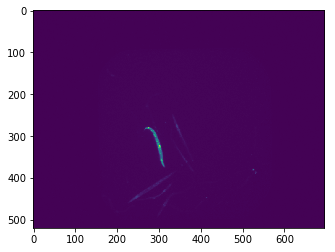

In [21]:
%matplotlib inline
test_image_row=list(image_df.query('treated').sample(1).T.to_dict().values())[0]
test_img=Image.open(test_image_row['gfp_path'])
plt.imshow(test_img)

Now import all the GFP channel images and save as a list of numpy arrays

In [25]:
for i in range(0,np.shape(image_df)[0]):
    


97